<a href="https://colab.research.google.com/github/taerd/ML_lessons/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pygame
import operator

pygame 2.0.1 (SDL 2.0.14, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
c_radius = 2
c_color = (0,0,255)
c_thickness = 0 

bg_color = (255,255,255)
(width,height) = (640,480)

In [ ]:
# преобразование координат
def to_matplotlib(coords,height):
    return(coords[0],height - coords[1])

In [ ]:
# рисовка и обработка событий pygame
points = np.empty((0,2), dtype='int')

screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("#3")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0, 15)
        t = np.random.uniform(0, 2*np.pi)
        coord = [int(x+r*np.cos(t)), int(y+r*np.sin(t))]
        global points
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),int(point[1])),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

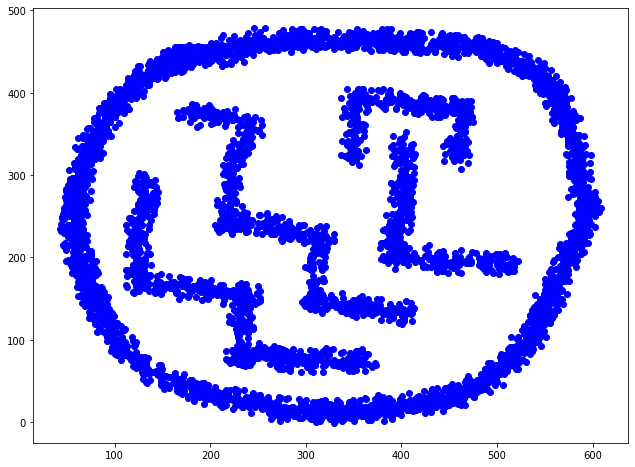

In [ ]:
# original art
points_matplot =  np.empty((0,2), dtype='int')

# перевод координат из pygame в matplotlib
for k in range(len(points)):
    new_array = np.ndarray((1,2),buffer = np.array(to_matplotlib(points[k],height)),dtype = int)
    points_matplot = np.append(points_matplot,new_array,axis=0)

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points_matplot[:,0],points_matplot[:,1],c="blue")
plt.show()
points = points_matplot

In [ ]:
class DB_SCAN():
    
    def __init__(self, dataset, eps=20.0, min_samples=10):
        self.dataset = dataset
        self.eps = eps
        self.min_samples = min_samples
        self.n_clusters = 0
        self.clusters = {0:[]}
        self.visited = set()
        self.clustered = set()
        self.labels = np.array([], dtype='i')
        self.fitted = False
        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
    def get_neighbours(self, P):
        return [list(Q) for Q in self.dataset if \
               self.get_dist(P,Q)<self.eps]
    
    def expand_cluster(self, P):
        self.n_clusters += 1
        # создаем новый список в словаре
        self.clusters[self.n_clusters] = []
        # перевод в кортежи для добавления в set
        self.clustered.add(tuple(P))
        # добавление в кластер саму точку
        self.clusters[self.n_clusters].append(P)
        # поиск соседей
        neighbours = self.get_neighbours(P)
        # пока не дойдем до конца соседей
        while neighbours:
            Q = neighbours.pop()
            if tuple(Q) not in self.visited:
                self.visited.add(tuple(Q))
                Q_neighbours = self.get_neighbours(Q)
                if len(Q_neighbours)>self.min_samples:
                    neighbours.extend(Q_neighbours)
            if tuple(Q) not in self.clustered:
                #добавляем в кластер
                self.clustered.add(tuple(Q))
                # увеличиваем словарик
                self.clusters[self.n_clusters].append(Q)
                if Q in self.clusters[0]: # python list required not np.array
                    self.clusters[0].remove(Q)
                    
    def fit(self):
        for P in self.dataset:
            P = list(P)
            if tuple(P) in self.visited:
                continue
            self.visited.add(tuple(P))
            neighbours = self.get_neighbours(P)
            if len(neighbours)<self.min_samples:
                self.clusters[0].append(P)
            else:
                self.expand_cluster(P)
        self.fitted = True
        
    def get_labels(self):
        labels = []
        if not self.fitted:
            self.fit()
        for P in self.dataset:
            for i in range(self.n_clusters+1):
                if list(P) in self.clusters[i]:
                    labels.append(int(i))                    
        self.labels = np.array(labels, dtype='i')
        return self.labels 


In [ ]:
m = 5

## Находим eps

In [ ]:
def get_dist(list1,list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
def get_m_closest_neighbours(P,neighbours,dataset):
    dist = {}
    for k,Q in enumerate(dataset):
        dist[k] = get_dist(P,Q)
    return sorted(dist.items(), key = operator.itemgetter(1))[1:neighbours+1]

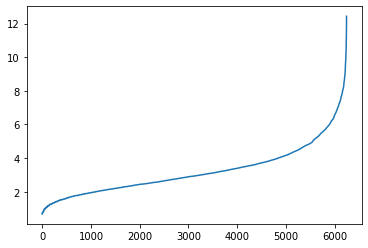

In [ ]:
means_for_each_point = np.array([] , dtype='f')
for point in points:
    distances = get_m_closest_neighbours(point,m,points)
    distances = np.array(distances)
    means_for_each_point = np.append(means_for_each_point , np.mean(distances[:,1]) )
    
    
plt.plot(sorted(means_for_each_point));

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(means_for_each_point).describe()

,0
count,6241.000000
mean,3.238779
std,1.487527
min,0.682843
25%,2.225798
50%,2.936746
75%,3.850419
max,12.435878


In [ ]:
eps = 6

## Обучение

In [ ]:
dbscan = DB_SCAN(points,eps,m)
dbscan.fit()
labels  = dbscan.get_labels()

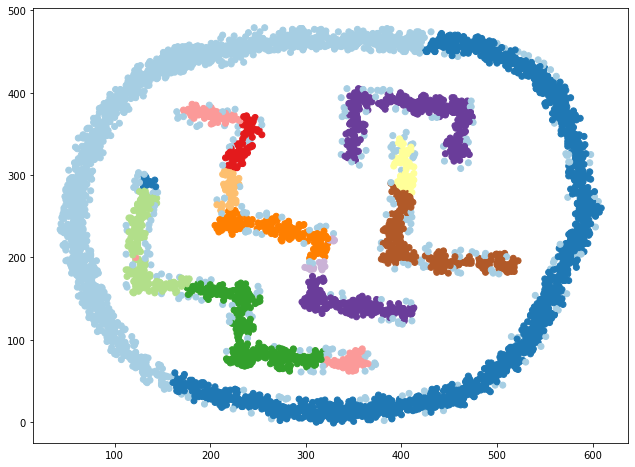

In [ ]:
fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points[:,0],points[:,1],c = labels , cmap = plt.cm.Paired)
plt.show()

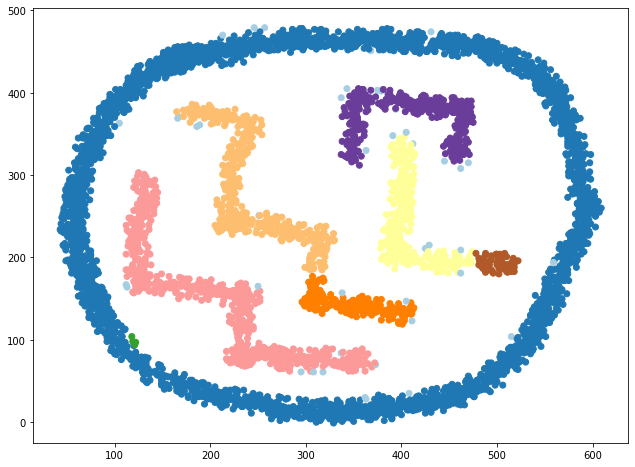

In [ ]:
# Случай когда eps увеличено
dbscan = DB_SCAN(points,eps+2,m)
dbscan.fit()
labels  = dbscan.get_labels()

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points[:,0],points[:,1],c = labels , cmap = plt.cm.Paired)
plt.show()

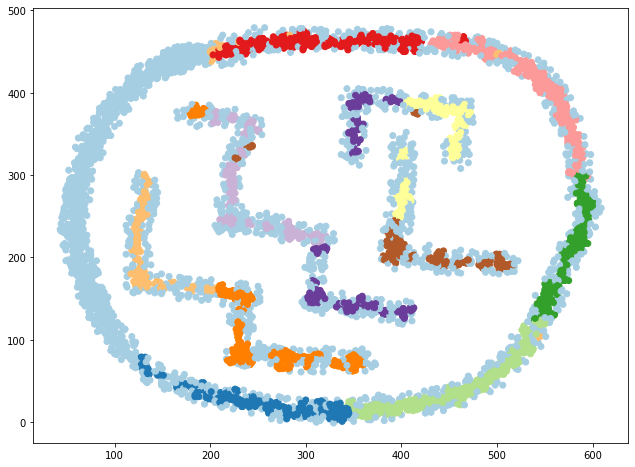

In [ ]:
# Случай когда eps увеличено
dbscan = DB_SCAN(points,eps-2,m)
dbscan.fit()
labels  = dbscan.get_labels()

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points[:,0],points[:,1],c = labels , cmap = plt.cm.Paired)
plt.show()